In [5]:
#libraries
import numpy as np 
import pandas as pd 
import os
import json
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
# import lightgbm as lgb
import xgboost as xgb
import time
import datetime
from PIL import Image
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import gc
# from catboost import CatBoostClassifier
from tqdm import tqdm_notebook
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.tools as tls
import random
import warnings
warnings.filterwarnings("ignore")
from functools import partial
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)
pd.set_option('max_rows', 100)
import os
import scipy as sp
from math import sqrt
from collections import Counter
from sklearn.metrics import confusion_matrix as sk_cmatrix

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer
from sklearn.ensemble import RandomForestClassifier
# import langdetect
import eli5
from IPython.display import display 

from sklearn.metrics import cohen_kappa_score
def kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')


In [6]:
bread_labels = pd.read_csv('../pet_data/breed_labels.csv')
color_labels = pd.read_csv('../pet_data/color_labels.csv')
state_labels = pd.read_csv('../pet_data/state_labels.csv')
test_sample_submission = pd.read_csv('../pet_data/test/sample_submission.csv')
test = pd.read_csv('../pet_data/test/test.csv')
train = pd.read_csv('../pet_data/train.csv')
train['dataset_type'] = 'train'
test['dataset_type'] = 'test'
all_data = pd.concat([train, test])

In [7]:
pet_id_adopt_rate = pd.DataFrame([train.PetID, train.AdoptionSpeed]).transpose()

In [8]:
pet_id_adopt_rate.sort_values(by=['PetID'], ascending=True)

,PetID,AdoptionSpeed
3057,0008c5398,3
4839,000a290e4,2
14218,000fb9572,3
7933,0011d7c25,2
3722,00156db4a,1
9848,001a1aaad,2
11520,001b1507c,1
4762,002230dea,1
6760,002278114,1
3230,0025a8313,4


In [9]:
pet_id_adopt_rate.PetID.value_counts()

9acd96273    1
19fe29040    1
bb43b6a0d    1
8c17f26c4    1
146b9d6e7    1
89c28aad0    1
f5b2c6fc0    1
3622c0bcf    1
24af5742e    1
3f568e3a2    1
716167b76    1
3b901ae31    1
591fa7c31    1
d1de97c49    1
f9df8656a    1
7d930d08c    1
cc7d90ef4    1
89bdd90b8    1
832a83f42    1
9a4bbdd8d    1
e50570999    1
a93c04347    1
0e4ef28c9    1
04a6267e4    1
b99d5d532    1
c5e4cfab0    1
5fde0ce59    1
015770429    1
8e2723a38    1
21fc38738    1
91d238a62    1
87fa5c42b    1
171113c99    1
9f07e2b51    1
19d7de899    1
171af089c    1
91b088719    1
66a1d5bc4    1
fd67a3f2c    1
64eed5e14    1
621b83ac7    1
9572f7e6b    1
5fed61438    1
596d784b2    1
4e290a43a    1
182aec7a4    1
c32ecd5bf    1
bb74a9d58    1
fe1edf930    1
22a0baf52    1
            ..
a98a5b0e8    1
01e517961    1
1ce681aa7    1
f74ad48ff    1
11c88e3be    1
c55f2f503    1
792c38c44    1
41ae99ff2    1
3658ee105    1
b5fd8a091    1
38063ee14    1
8df39788a    1
a25a5ad9e    1
0149d04e7    1
b9893e2fb    1
97a020fe8 

In [10]:
os.listdir('../pet_data/')

['train_images',
 'test_images',
 'color_labels.csv',
 'breed_labels.csv',
 'train_sentiment',
 'test',
 'test_sentiment',
 'train_metadata',
 'test_metadata',
 'train.csv',
 'state_labels.csv']


Target: Adoption speed¶

    0 - Pet was adopted on the same day as it was listed.
    1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
    2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
    3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
    4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).



all_data.drop(['Description'], axis=1).head()

In [11]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18941 entries, 0 to 3947
Data columns (total 25 columns):
AdoptionSpeed    14993 non-null float64
Age              18941 non-null int64
Breed1           18941 non-null int64
Breed2           18941 non-null int64
Color1           18941 non-null int64
Color2           18941 non-null int64
Color3           18941 non-null int64
Description      18927 non-null object
Dewormed         18941 non-null int64
Fee              18941 non-null int64
FurLength        18941 non-null int64
Gender           18941 non-null int64
Health           18941 non-null int64
MaturitySize     18941 non-null int64
Name             17381 non-null object
PetID            18941 non-null object
PhotoAmt         18941 non-null float64
Quantity         18941 non-null int64
RescuerID        18941 non-null object
State            18941 non-null int64
Sterilized       18941 non-null int64
Type             18941 non-null int64
Vaccinated       18941 non-null int64
VideoAmt  

Text(0.5, 1.0, 'Adaption speed classes counts')

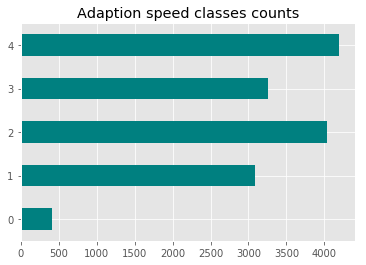

In [12]:
train.AdoptionSpeed.value_counts().sort_index().plot('barh', color='teal')
plt.title('Adaption speed classes counts')

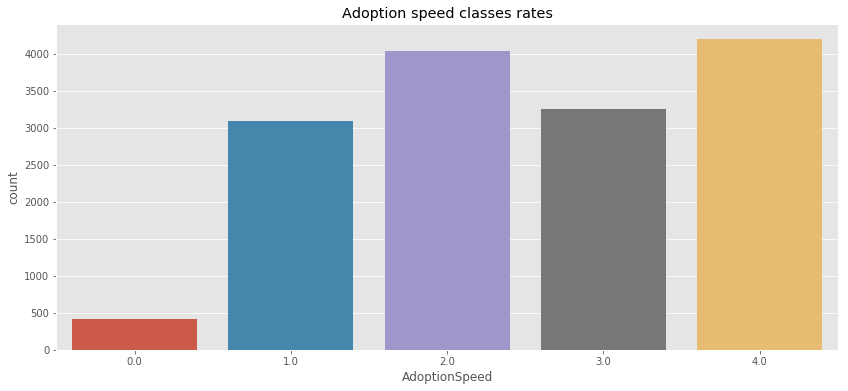

In [13]:
plt.figure(figsize=(14, 6));
g = sns.countplot(x='AdoptionSpeed', data=all_data.loc[all_data['dataset_type'] == 'train']);
plt.title('Adoption speed classes rates');
ax=g.axes

In [14]:
ax.patches[0].get_x()

-0.4

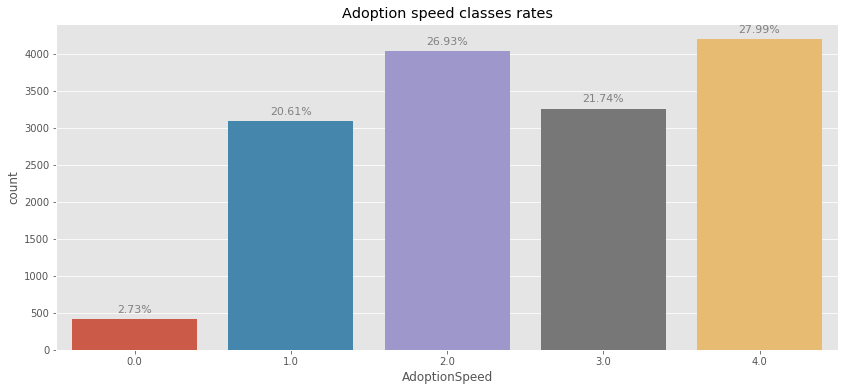

In [15]:
plt.figure(figsize=(14, 6));
g = sns.countplot(x='AdoptionSpeed', data=all_data.loc[all_data['dataset_type'] == 'train'])
plt.title('Adoption speed classes rates');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / train.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points')  

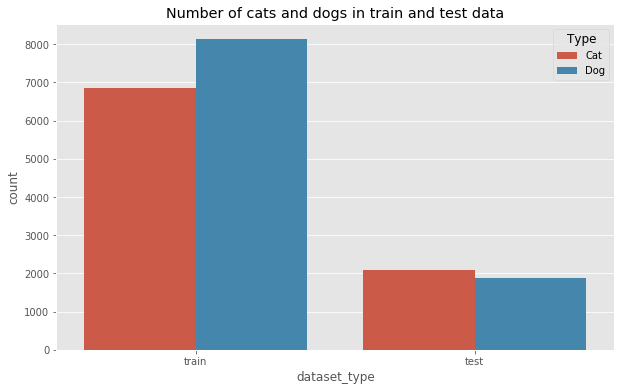

In [16]:
all_data['Type'] = all_data['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')
plt.figure(figsize=(10, 6));
sns.countplot(x='dataset_type', data=all_data, hue='Type');
plt.title('Number of cats and dogs in train and test data');

In [17]:
main_count = train['AdoptionSpeed'].value_counts(normalize=True).sort_index()
def prepare_plot_dict(df, col, main_count):
    """
    Preparing dictionary with data for plotting.
    
    I want to show how much higher/lower are the rates of Adoption speed for the current column comparing to base values (as described higher),
    At first I calculate base rates, then for each category in the column I calculate rates of Adoption speed and find difference with the base rates.
    
    """
    main_count = dict(main_count)
    plot_dict = {}
    for i in df[col].unique():
        val_count = dict(df.loc[df[col] == i, 'AdoptionSpeed'].value_counts().sort_index())

        for k, v in main_count.items():
            if k in val_count:
                plot_dict[val_count[k]] = ((val_count[k] / sum(val_count.values())) / main_count[k]) * 100 - 100
            else:
                plot_dict[0] = 0

    return plot_dict

def make_count_plot(df, x, hue='AdoptionSpeed', title='', main_count=main_count):
    """
    Plotting countplot with correct annotations.
    """
    g = sns.countplot(x=x, data=df, hue=hue);
    plt.title(f'AdoptionSpeed {title}');
    ax = g.axes

    plot_dict = prepare_plot_dict(df, x, main_count)

    for p in ax.patches:
        h = p.get_height() if str(p.get_height()) != 'nan' else 0
        text = f"{plot_dict[h]:.0f}%" if plot_dict[h] < 0 else f"+{plot_dict[h]:.0f}%"
        ax.annotate(text, (p.get_x() + p.get_width() / 2., h),
             ha='center', va='center', fontsize=11, color='green' if plot_dict[h] > 0 else 'red', rotation=0, xytext=(0, 10),
             textcoords='offset points') 
        

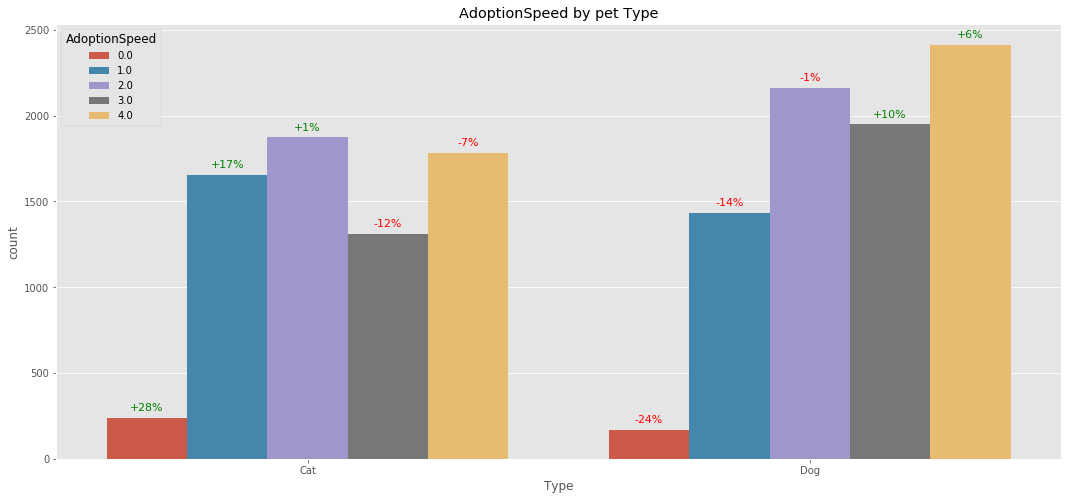

In [18]:
plt.figure(figsize=(18, 8));
make_count_plot(df=all_data.loc[all_data['dataset_type'] == 'train'], x='Type', title='by pet Type')


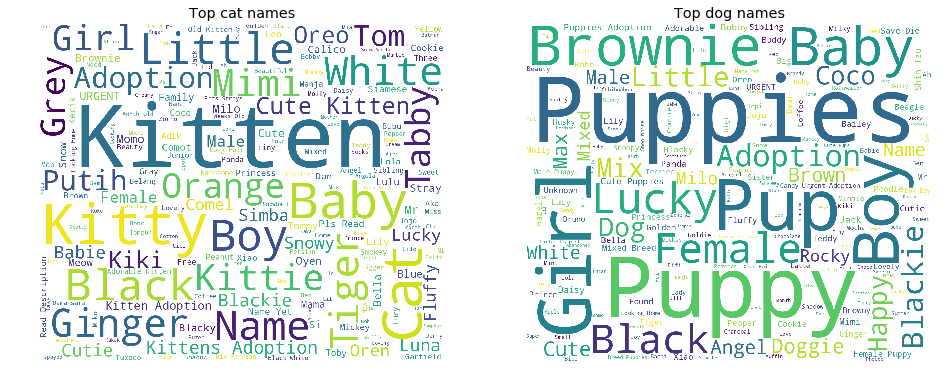

In [19]:
ig, ax = plt.subplots(figsize = (16, 12))
plt.subplot(1, 2, 1)
text_cat = ' '.join(all_data.loc[all_data['Type'] == 'Cat', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top cat names')
plt.axis("off")

plt.subplot(1, 2, 2)
text_dog = ' '.join(all_data.loc[all_data['Type'] == 'Dog', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top dog names')
plt.axis("off")

plt.show()

In [20]:
print('Most popular pet names and AdoptionSpeed')
for n in train['Name'].value_counts().index[:5]:
    print(n)
    print(train.loc[train['Name'] == n, 'AdoptionSpeed'].value_counts().sort_index())
    print('')


Most popular pet names and AdoptionSpeed
Baby
0     2
1    11
2    15
3    11
4    27
Name: AdoptionSpeed, dtype: int64

Lucky
0     5
1    14
2    16
3    12
4    17
Name: AdoptionSpeed, dtype: int64

Brownie
0     1
1    11
2    14
3    12
4    16
Name: AdoptionSpeed, dtype: int64

No Name
0     3
1    14
2    11
3     6
4    20
Name: AdoptionSpeed, dtype: int64

Mimi
0     3
1    12
2    13
3     7
4    17
Name: AdoptionSpeed, dtype: int64



In [21]:
train['Name'] = train['Name'].fillna('Unnamed')
test['Name'] = test['Name'].fillna('Unnamed')
all_data['Name'] = all_data['Name'].fillna('Unnamed')

train['No_name'] = 0
train.loc[train['Name'] == 'Unnamed', 'No_name'] = 1
test['No_name'] = 0
test.loc[test['Name'] == 'Unnamed', 'No_name'] = 1
all_data['No_name'] = 0
all_data.loc[all_data['Name'] == 'Unnamed', 'No_name'] = 1

print(f"Rate of unnamed pets in train data: {train['No_name'].sum() * 100 / train['No_name'].shape[0]:.4f}%.")
print(f"Rate of unnamed pets in test data: {test['No_name'].sum() * 100 / test['No_name'].shape[0]:.4f}%.")

Rate of unnamed pets in train data: 8.4173%.
Rate of unnamed pets in test data: 7.6748%.


In [24]:
all_data

,AdoptionSpeed,Age,Breed1,Breed2,Color1,Color2,Color3,Description,Dewormed,Fee,FurLength,Gender,Health,MaturitySize,Name,PetID,PhotoAmt,Quantity,RescuerID,State,Sterilized,Type,Vaccinated,VideoAmt,dataset_type,No_name
0,2.0,3,299,0,1,7,0,Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care.,2,100,1,1,1,1,Nibble,86e1089a3,1.0,1,8480853f516546f6cf33aa88cd76c379,41326,2,Cat,2,0,train,0
1,0.0,1,265,0,1,2,0,I just found it alone yesterday near my apartment. It was shaking so I had to bring it home to provide temporary care.,3,0,2,1,1,2,No Name Yet,6296e909a,2.0,1,3082c7125d8fb66f7dd4bff4192c8b14,41401,3,Cat,3,0,train,0
2,3.0,1,307,0,2,7,0,"Their pregnant mother was dumped by her irresponsible owner at the roadside near some shops in Subang Jaya. Gave birth to them at the roadside. They are all healthy and adorable puppies. Already dewormed, vaccinated and ready to go to a home. No tying or caging for long hours as guard dogs. However, it is acceptable to cage or tie for precautionary purposes. Interested to adopt pls call me.",1,0,2,1,1,2,Brisco,3422e4906,7.0,1,fa90fa5b1ee11c86938398b60abc32cb,41326,2,Dog,1,0,train,0
3,2.0,4,307,0,1,2,0,"Good guard dog, very alert, active, obedience waiting for her good master, plz call or sms for more details if you really get interested, thanks!!",1,150,1,2,1,2,Miko,5842f1ff5,8.0,1,9238e4f44c71a75282e62f7136c6b240,41401,2,Dog,1,0,train,0
4,2.0,1,307,0,1,0,0,"This handsome yet cute boy is up for adoption. He is the most playful pal we've seen in our puppies. He loves to nibble on shoelaces , Chase you at such a young age. Imagine what a cute brat he will be when he grows. We are looking for a loving home for Hunter , one that will take care of him and give him the love that he needs. Please call urgently if you would like to adopt this cutie.",2,0,1,1,1,2,Hunter,850a43f90,3.0,1,95481e953f8aed9ec3d16fc4509537e8,41326,2,Dog,2,0,train,0
5,2.0,3,266,0,5,6,0,"This is a stray kitten that came to my house. Have been feeding it, but cannot keep it.",2,0,1,2,1,2,Unnamed,d24c30b4b,2.0,1,22fe332bf9c924d4718005891c63fbed,41326,2,Cat,2,0,train,1
6,1.0,12,264,264,1,0,0,anyone within the area of ipoh or taiping who interested to adopt my cat can contact my father at this number (mazuvil)or can just email me. currently bulat is at my hometown at perak but anyone outside the area still want to adopt can travel there to my hometown.there is a lot of cats in my house rite now..i think i should let one of them go to a better owner who can give better attention to him.,2,300,3,1,1,2,BULAT,1caa6fcdb,3.0,1,1e0b5a458b5b77f5af581d57ebf570b3,41326,3,Cat,2,0,train,0
7,3.0,0,307,0,1,2,7,Siu Pak just give birth on 13/6/10 to 6puppies. Interested pls call or sms me. Left 2female puppies on 2/7/10,2,0,1,2,1,2,Siu Pak & Her 6 Puppies,97aa9eeac,9.0,6,1fba5f6e5480946254590d48f9c5198d,41326,2,Dog,2,0,train,0
8,1.0,2,265,0,6,0,0,"healthy and active, feisty kitten found in neighbours' garden. Not sure of sex.",2,0,2,2,1,2,Unnamed,c06d167ca,6.0,1,d8af7afece71334473575c9f70daf00d,41326,2,Cat,2,0,train,1
9,4.0,12,265,0,1,7,0,"Very manja and gentle stray cat found, we would really like to find a home for it because we cannot keep her for ourselves for long. Has a very cute high pitch but soft meow. Please contact me if you would be interested in adopting.",3,0,2,2,1,2,Kitty,7a0942d61,2.0,1,1f3f36e4b18e94855b3e88af0852fdc4,41326,3,Cat,3,0,train,0
